In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import signal
from data_preprocessing import preprocess

In [ ]:
"""Coherence calculation of the data. This was not used as it resulted very similar to the CSD matrices, but are more computationally 
demanding."""

In [2]:
df1 = preprocess()
df1

,id,schizo,region,eeg_data,freqs,power,freqs_theta,power_theta,freqs_alpha,power_alpha,freqs_beta,power_beta
0,S164W1,0,F7,"[9.48, 109.94, 308.96, 348.76, 269.15, 208.5, ...","[0.0, 0.016666666666666666, 0.0333333333333333...","[158498.64, 22861.23246172353, 50204.591134708...","[4.0, 4.016666666666667, 4.033333333333333, 4....","[12653.158544343263, 48354.997824733204, 69015...","[8.0, 8.016666666666666, 8.033333333333333, 8....","[26122.060497561743, 20216.5499335299, 26479.2...","[12.0, 12.016666666666666, 12.033333333333333,...","[67789.7194050899, 53651.184341372245, 14663.9..."
1,S164W1,0,F3,"[-151.64, 9.48, 259.68, 318.44, 348.76, 299.48...","[0.0, 0.016666666666666666, 0.0333333333333333...","[136455.69, 8409.359229225813, 38949.763344850...","[4.0, 4.016666666666667, 4.033333333333333, 4....","[17616.150835440894, 92822.94521800874, 35753....","[8.0, 8.016666666666666, 8.033333333333333, 8....","[65223.81328197708, 17790.704272697334, 33462....","[12.0, 12.016666666666666, 12.033333333333333,...","[85636.12307327495, 62779.98957620811, 20635.8..."
2,S164W1,0,F4,"[159.22, 339.29, 519.36, 458.7, 189.55, 58.76,...","[0.0, 0.016666666666666666, 0.0333333333333333...","[52183.59, 26054.72511793837, 48306.3943627817...","[4.0, 4.016666666666667, 4.033333333333333, 4....","[27350.130377207373, 103035.31741294809, 23361...","[8.0, 8.016666666666666, 8.033333333333333, 8....","[40306.14337473731, 8689.729016518411, 5398.53...","[12.0, 12.016666666666666, 12.033333333333333,...","[41202.881615130245, 37928.20118507875, 27839...."
3,S164W1,0,F8,"[259.68, 318.44, 358.24, 259.68, 9.48, -130.79...","[0.0, 0.016666666666666666, 0.0333333333333333...","[81490.68000000001, 11867.360341841628, 57344....","[4.0, 4.016666666666667, 4.033333333333333, 4....","[28052.33049531209, 98464.64021492765, 31475.6...","[8.0, 8.016666666666666, 8.033333333333333, 8....","[56663.7473308475, 21478.899975593606, 21846.7...","[12.0, 12.016666666666666, 12.033333333333333,...","[34437.71856971881, 42838.963068459416, 21701...."
4,S164W1,0,T3,"[238.83, 399.94, 519.36, 458.7, 149.74, -11.37...","[0.0, 0.016666666666666666, 0.0333333333333333...","[109031.83, 33239.29978913151, 20402.886718539...","[4.0, 4.016666666666667, 4.033333333333333, 4....","[27230.940695474685, 51325.96154059415, 16416....","[8.0, 8.016666666666666, 8.033333333333333, 8....","[38862.85559282637, 32335.96769898448, 19762.8...","[12.0, 12.016666666666666, 12.033333333333333,...","[70277.7158139276, 92763.56711893788, 44459.47..."
...,...,...,...,...,...,...,...,...,...,...,...,...
1339,32w1,1,Pz,"[-40.9, 48.76, 209.21, 158.88, -20.45, -171.46...","[0.0, 0.016666666666666666, 0.0333333333333333...","[42580.31999999999, 40506.371012857475, 43940....","[4.0, 4.016666666666667, 4.033333333333333, 4....","[34075.18981837448, 70944.37290985597, 26477.7...","[8.0, 8.016666666666666, 8.033333333333333, 8....","[65239.84069572714, 53987.6222178226, 100021.2...","[12.0, 12.016666666666666, 12.033333333333333,...","[15972.457940048344, 3323.8153445139715, 10079..."
1340,32w1,1,P4,"[48.76, 169.89, 199.78, 108.54, -61.35, -121.1...","[0.0, 0.016666666666666666, 0.0333333333333333...","[34866.18, 40066.88656466791, 51873.5441644073...","[4.0, 4.016666666666667, 4.033333333333333, 4....","[46741.947048847105, 97860.25136131978, 16064....","[8.0, 8.016666666666666, 8.033333333333333, 8....","[67977.03931829463, 64723.56041221257, 85498.0...","[12.0, 12.016666666666666, 12.033333333333333,...","[5244.455209045493, 17408.245710643827, 18500...."
1341,32w1,1,T6,"[188.76, 248.54, 239.1, 169.89, 48.76, 9.44, 9...","[0.0, 0.016666666666666666, 0.0333333333333333...","[26777.709999999995, 35572.958972712506, 44002...","[4.0, 4.016666666666667, 4.033333333333333, 4....","[43216.979730058716, 61507.74634314921, 49234....","[8.0, 8.016666666666666, 8.033333333333333, 8....","[53962.70201381972, 48058.373818026, 69591.832...","[12.0, 12.016666666666666, 12.033333333333333,...","[17390.29803110395, 21032.11576

In [3]:
def extract_power(df, patient_id, frequency_band):
    # Filter patient data
    patients = df[df['id'] == patient_id]
    power_data = []

    # Loop through regions and get the data
    for region in patients['region'].unique():
        region_data = patients[patients['region'] == region]
        power_data.append(region_data[frequency_band].values[0])

    power_df = pd.DataFrame(power_data).transpose()

    if power_df.isnull().values.any():
        print(f"Warning: Missing values detected in power data for patient {patient_id}")
        # Replace empty values with 0
        power_df = power_df.fillna(0)

    return power_df

In [4]:
# Calculate coherence between regions 
def calculate_coherence_regions(power_df, sampling_freq):
    # Initialize empty matrix for coherence values
    coherence_matrix_values = np.zeros((len(power_df.columns), len(power_df.columns)))

    # Calculate coherence for each pair of regions
    for i, region_1 in enumerate(power_df.columns):
        for j, region_2 in enumerate(power_df.columns):
            # Compute coherence between two regions
            _, coherence_values = signal.coherence(power_df[region_1], power_df[region_2], fs=128, nperseg=256)
            coherence_matrix_values[i, j] = np.mean(coherence_values)  
    return coherence_matrix_values

# Average coherence across multiple patients
def average_coherence(patient_ids, wave_option='power_beta'):
    coherence_matrices = [
        calculate_coherence_regions(extract_power(df1, patient_id, wave_option), sampling_freq=128)
        for patient_id in patient_ids
    ]
    # Calculate the average coherence matrix 
    average_coherence_matrix = np.mean(coherence_matrices, axis=0)

    return pd.DataFrame(average_coherence_matrix)


In [5]:
# Plot coherence matrices for healthy vs schizophrenic patients
def plot_correlation_matrix(healthy_patients, schizo_patients, wave_option='power_beta'):
    # Calculate average coherence for healthy and schizophrenic patients
    avg_coherence_healthy = average_coherence(healthy_patients, wave_option=wave_option)
    avg_coherence_schizo = average_coherence(schizo_patients, wave_option=wave_option)

    # Calculate coherence difference (healthy - schizo)
    coherence_difference = avg_coherence_healthy - avg_coherence_schizo

    regions = avg_coherence_healthy.columns.tolist()  

    # Plot for healthy patients
    plt.figure(figsize=(10, 8))
    sns.heatmap(avg_coherence_healthy, annot=True, cmap='Oranges', fmt='.2f', xticklabels=regions, yticklabels=regions)
    plt.title(f"Average Coherence Matrix for Healthy Patients ({wave_option.capitalize()})")
    plt.xlabel('Regions (Channels)')
    plt.ylabel('Regions (Channels)')
    plt.show()

    # Plot for schizophrenic patients
    plt.figure(figsize=(10, 8))
    sns.heatmap(avg_coherence_schizo, annot=True, cmap='Oranges', fmt='.2f', xticklabels=regions, yticklabels=regions)
    plt.title(f"Average Coherence Matrix for Schizophrenic Patients ({wave_option.capitalize()})")
    plt.xlabel('Regions (Channels)')
    plt.ylabel('Regions (Channels)')
    plt.show()

    # Plot coherence difference (healthy - schizo)
    plt.figure(figsize=(10, 8))
    sns.heatmap(coherence_difference, annot=True, cmap='Oranges', fmt='.2f', xticklabels=regions, yticklabels=regions)
    plt.title('Coherence Difference (Healthy - Schizophrenic)')
    plt.xlabel('Regions (Channels)')
    plt.ylabel('Regions (Channels)')
    plt.show()

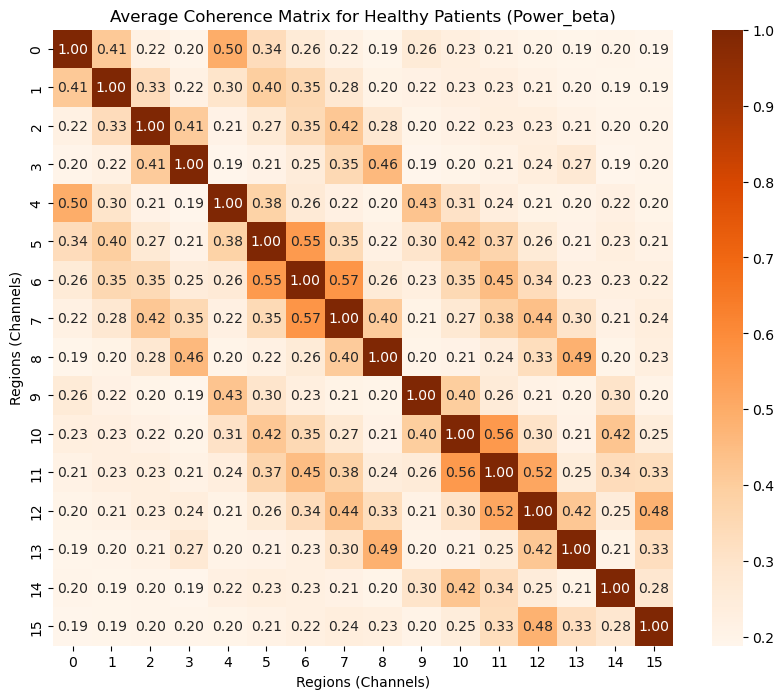

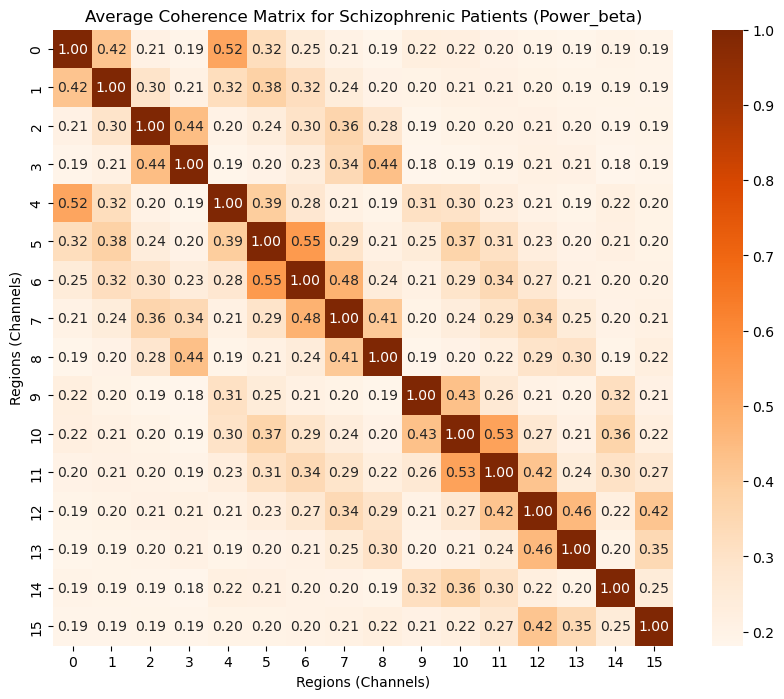

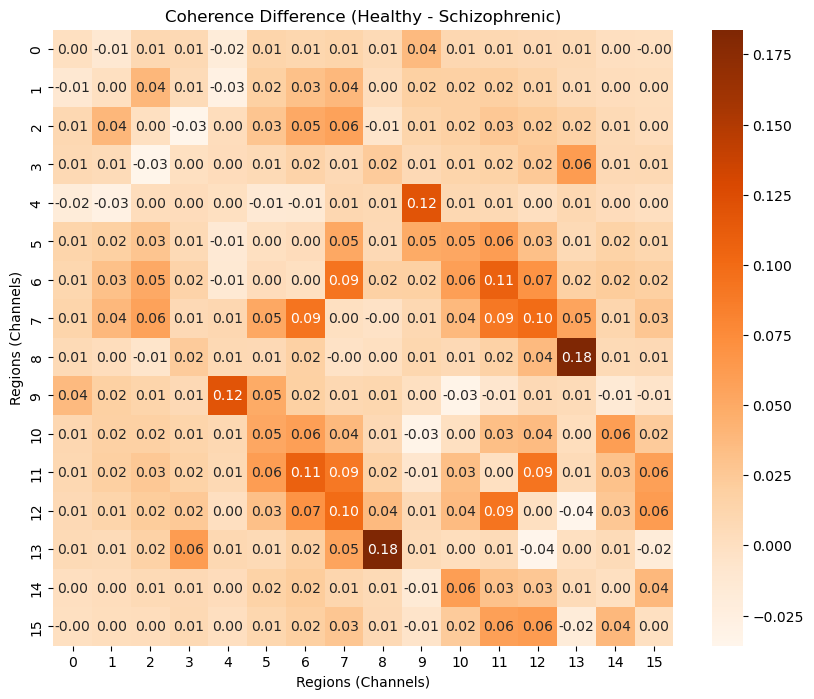

In [6]:
healthy_patients = df1[df1['schizo'] == 0]['id'].unique().tolist()
schizo_patients = df1[df1['schizo'] == 1]['id'].unique().tolist()
original_correlation = plot_correlation_matrix(healthy_patients, schizo_patients, wave_option='power_beta')

